## SSD Metric Test

In [2]:
import numpy as np
from PIL import Image
import imageio
import numpy as np
from dipy.viz import regtools
from dipy.data import fetch_stanford_hardi, read_stanford_hardi
from dipy.data.fetcher import fetch_syn_data, read_syn_data
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,SSDMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform2D,
                                   RigidTransform2D,
                                   AffineTransform2D)


#
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")

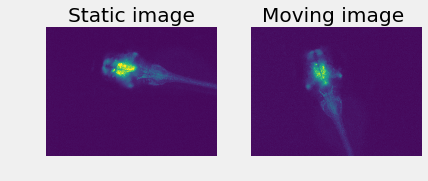

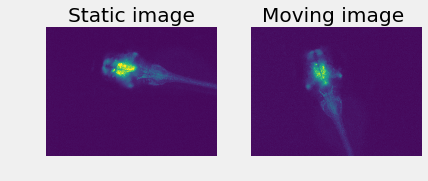

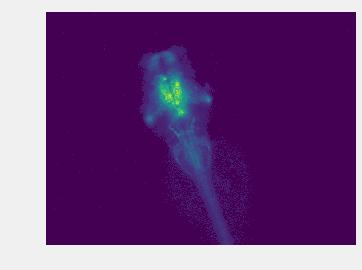

Images with center of mass transformed


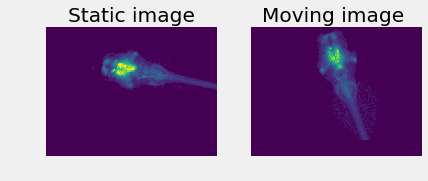

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


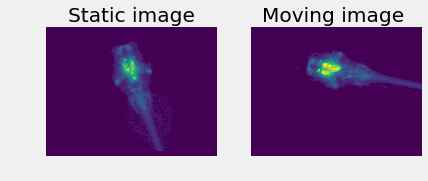

In [3]:

# coding: utf-8

# In[2]:





# In[3]:


"""
Read image
"""
def read_image(file):
    image = imageio.imread(file)
    return image

"""
Show image
"""
def show_image(image,title=""):
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()
    
    
"""
Plot two images
"""
def plot_two_images(static, moving, text=""):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(static)
    plt.title("Static image")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(moving)
    plt.title("Moving image" + " " + text)
    plt.axis("off")
    plt.show()
    
    
# image1
image1 = read_image("Image_20449.tif")
image2 = read_image("Image_20450.tif")

plot_two_images(image1, image2)



# In[4]:


static = np.copy(image1)
moving = np.copy(image2)


#%%
## Threshold image
def threshold_image(im):
    im[im<np.mean(im)]=0
    return im

static = threshold_image(static)
moving = threshold_image(moving)

plot_two_images(image1, image2)


# In[5]:


identity = np.eye(3)
affine_map = AffineMap(identity,
                       static.shape, None,
                       moving.shape, None)
resampled = affine_map.transform(moving)


# In[6]:


show_image(moving)


# In[7]:


c_of_mass = transform_centers_of_mass(static, None,
                                      moving, None)


# In[8]:


c_of_mass


# In[9]:


print("Images with center of mass transformed")
transformed = c_of_mass.transform(moving)
plot_two_images(static, transformed)


# In[13]:


sampling_prop = None
metric = SSDMetric(sampling_prop)


# In[22]:


level_iters = [10000, 1000, 100]
sigmas = [3.0, 1.0, 0.0]
factors = [4, 2, 1]

"""
Now we go ahead and instantiate the registration class with the configuration
we just prepared
"""
affreg = AffineRegistration(metric=metric,
                            level_iters=level_iters,
                            sigmas=sigmas,
                            factors=factors)


# In[15]:

transform = TranslationTransform2D()
params0 = None
starting_affine = c_of_mass.affine
translation = affreg.optimize(static, moving, transform, params0,
                              None, None,
                              starting_affine=starting_affine)


# In[17]:
transformed = translation.transform(moving)


# In[19]:
plot_two_images(transformed,static)
plt.show()


## Test 2 ( Affine 3d)


Dataset is already in place. If you want to fetch it again please first remove the folder C:\Users\mchiv\.dipy\stanford_hardi 
Dataset is already in place. If you want to fetch it again please first remove the folder C:\Users\mchiv\.dipy\stanford_hardi 
Data size is approximately 12MB
Dataset is already in place. If you want to fetch it again please first remove the folder C:\Users\mchiv\.dipy\syn_test 
Data size is approximately 12MB
Dataset is already in place. If you want to fetch it again please first remove the folder C:\Users\mchiv\.dipy\syn_test 
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


'\n.. figure:: transformed_affine_0.png\n   :align: center\n.. figure:: transformed_affine_1.png\n   :align: center\n.. figure:: transformed_affine_2.png\n   :align: center\n\n   Registration result with an affine transform, using Mutual Information.\n\n.. [Mattes03] Mattes, D., Haynor, D. R., Vesselle, H., Lewellen, T. K.,\n              Eubank, W. (2003). PET-CT image registration in the chest using\n              free-form deformations. IEEE Transactions on Medical Imaging,\n              22(1), 120-8.\n.. [Avants11] Avants, B. B., Tustison, N., & Song, G. (2011). Advanced\n              Normalization Tools ( ANTS ), 1-35.\n\n.. include:: ../links_names.inc\n\n'

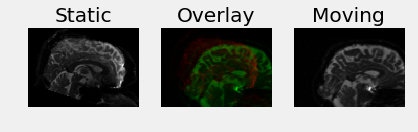

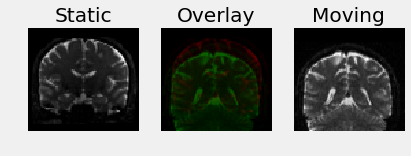

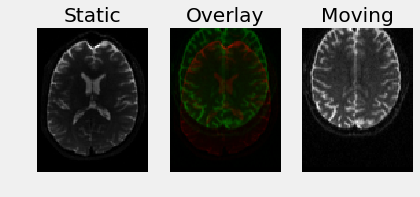

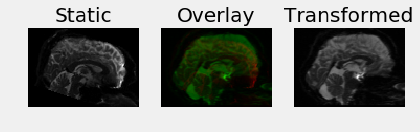

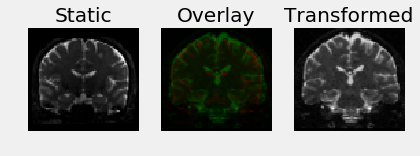

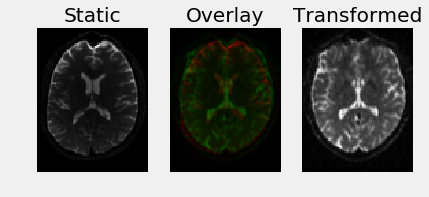

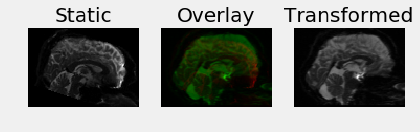

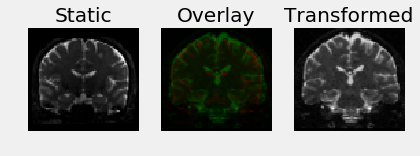

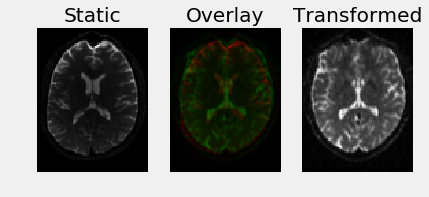

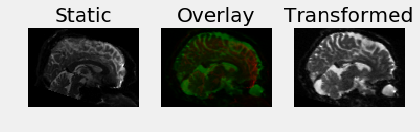

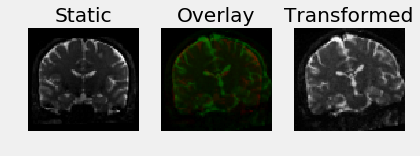

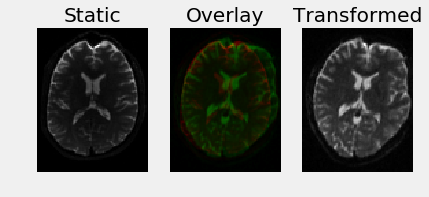

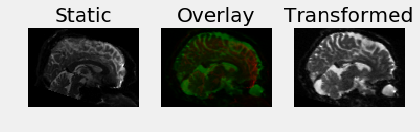

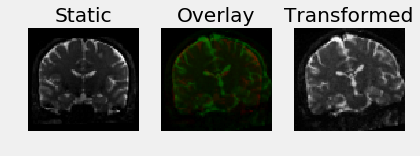

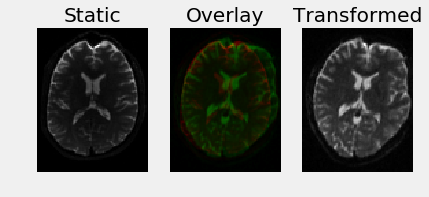

In [4]:
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)


"""
==========================================
Affine Registration in 3D
==========================================
This example explains how to compute an affine transformation to register two
3D volumes by maximization of their Mutual Information [Mattes03]_. The
optimization strategy is similar to that implemented in ANTS [Avants11]_.
"""


"""
Let's fetch two b0 volumes, the static image will be the b0 from the Stanford
HARDI dataset
"""

fetch_stanford_hardi()
nib_stanford, gtab_stanford = read_stanford_hardi()
static = np.squeeze(nib_stanford.get_data())[..., 0]
static_grid2world = nib_stanford.affine

"""
Now the moving image
"""

fetch_syn_data()
nib_syn_t1, nib_syn_b0 = read_syn_data()
moving = np.array(nib_syn_b0.get_data())
moving_grid2world = nib_syn_b0.affine

"""
We can see that the images are far from aligned by drawing one on top of
the other. The images don't even have the same number of voxels, so in order
to draw one on top of the other we need to resample the moving image on a grid
of the same dimensions as the static image, we can do this by "transforming"
the moving image using an identity transform
"""

identity = np.eye(4)
affine_map = AffineMap(identity,
                       static.shape, static_grid2world,
                       moving.shape, moving_grid2world)
resampled = affine_map.transform(moving)
regtools.overlay_slices(static, resampled, None, 0,
                        "Static", "Moving", "resampled_0.png")
regtools.overlay_slices(static, resampled, None, 1,
                        "Static", "Moving", "resampled_1.png")
regtools.overlay_slices(static, resampled, None, 2,
                        "Static", "Moving", "resampled_2.png")

"""
.. figure:: resampled_0.png
   :align: center
.. figure:: resampled_1.png
   :align: center
.. figure:: resampled_2.png
   :align: center

   Input images before alignment.
"""

"""
We can obtain a very rough (and fast) registration by just aligning the centers
of mass of the two images
"""

c_of_mass = transform_centers_of_mass(static, static_grid2world,
                                      moving, moving_grid2world)

"""
We can now transform the moving image and draw it on top of the static image,
registration is not likely to be good, but at least they will occupy roughly
the same space
"""

transformed = c_of_mass.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_com_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_com_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_com_2.png")

"""
.. figure:: transformed_com_0.png
   :align: center
.. figure:: transformed_com_1.png
   :align: center
.. figure:: transformed_com_2.png
   :align: center

   Registration result by aligning the centers of mass of the images.
"""

"""
This was just a translation of the moving image towards the static image, now
we will refine it by looking for an affine transform. We first create the
similarity metric (Mutual Information) to be used. We need to specify the
number of bins to be used to discretize the joint and marginal probability
distribution functions (PDF), a typical value is 32. We also need to specify
the percentage (an integer in (0, 100]) of voxels to be used for computing the
PDFs, the most accurate registration will be obtained by using all voxels, but
it is also the most time-consuming choice. We specify full sampling by passing
None instead of an integer
"""

nbins = 32
sampling_prop = None
metric = SSDMetric(sampling_prop)

"""
To avoid getting stuck at local optima, and to accelerate convergence, we use a
multi-resolution strategy (similar to ANTS [Avants11]_) by building a Gaussian
Pyramid. To have as much flexibility as possible, the user can specify how this
Gaussian Pyramid is built. First of all, we need to specify how many
resolutions we want to use. This is indirectly specified by just providing a
list of the number of iterations we want to perform at each resolution. Here we
will just specify 3 resolutions and a large number of iterations, 10000 at the
coarsest resolution, 1000 at the medium resolution and 100 at the finest. These
are the default settings
"""

level_iters = [10000, 1000, 100]

"""
To compute the Gaussian pyramid, the original image is first smoothed at each
level of the pyramid using a Gaussian kernel with the requested sigma. A good
initial choice is [3.0, 1.0, 0.0], this is the default
"""

sigmas = [3.0, 1.0, 0.0]

"""
Now we specify the sub-sampling factors. A good configuration is [4, 2, 1],
which means that, if the original image shape was (nx, ny, nz) voxels, then the
shape of the coarsest image will be about (nx//4, ny//4, nz//4), the shape in
the middle resolution will be about (nx//2, ny//2, nz//2) and the image at the
finest scale has the same size as the original image. This set of factors is
the default
"""

factors = [4, 2, 1]

"""
Now we go ahead and instantiate the registration class with the configuration
we just prepared
"""

affreg = AffineRegistration(metric=metric,
                            level_iters=level_iters,
                            sigmas=sigmas,
                            factors=factors)

"""
Using AffineRegistration we can register our images in as many stages as we
want, providing previous results as initialization for the next (the same logic
as in ANTS). The reason why it is useful is that registration is a non-convex
optimization problem (it may have more than one local optima), which means that
it is very important to initialize as close to the solution as possible. For
example, lets start with our (previously computed) rough transformation
aligning the centers of mass of our images, and then refine it in three stages.
First look for an optimal translation. The dictionary regtransforms contains
all available transforms, we obtain one of them by providing its name and the
dimension (either 2 or 3) of the image we are working with (since we are
aligning volumes, the dimension is 3)
"""

transform = TranslationTransform3D()
params0 = None
starting_affine = c_of_mass.affine
translation = affreg.optimize(static, moving, transform, params0,
                              static_grid2world, moving_grid2world,
                              starting_affine=starting_affine)

"""
If we look at the result, we can see that this translation is much better than
simply aligning the centers of mass
"""

transformed = translation.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_trans_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_trans_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_trans_2.png")

"""
.. figure:: transformed_trans_0.png
   :align: center
.. figure:: transformed_trans_1.png
   :align: center
.. figure:: transformed_trans_2.png
   :align: center

   Registration result by translating the moving image, using Mutual Information.
"""

"""
Now lets refine with a rigid transform (this may even modify our previously
found optimal translation)
"""

transform = RigidTransform3D()
params0 = None
starting_affine = translation.affine
rigid = affreg.optimize(static, moving, transform, params0,
                        static_grid2world, moving_grid2world,
                        starting_affine=starting_affine)

"""
This produces a slight rotation, and the images are now better aligned
"""

transformed = rigid.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_rigid_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_rigid_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_rigid_2.png")

"""
.. figure:: transformed_rigid_0.png
   :align: center
.. figure:: transformed_rigid_1.png
   :align: center
.. figure:: transformed_rigid_2.png
   :align: center

   Registration result with a rigid transform, using Mutual Information.
"""

"""
Finally, lets refine with a full affine transform (translation, rotation, scale
and shear), it is safer to fit more degrees of freedom now, since we must be
very close to the optimal transform
"""

transform = AffineTransform3D()
params0 = None
starting_affine = rigid.affine
affine = affreg.optimize(static, moving, transform, params0,
                         static_grid2world, moving_grid2world,
                         starting_affine=starting_affine)

"""
This results in a slight shear and scale
"""

transformed = affine.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_affine_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_affine_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_affine_2.png")

"""
.. figure:: transformed_affine_0.png
   :align: center
.. figure:: transformed_affine_1.png
   :align: center
.. figure:: transformed_affine_2.png
   :align: center

   Registration result with an affine transform, using Mutual Information.

.. [Mattes03] Mattes, D., Haynor, D. R., Vesselle, H., Lewellen, T. K.,
              Eubank, W. (2003). PET-CT image registration in the chest using
              free-form deformations. IEEE Transactions on Medical Imaging,
              22(1), 120-8.
.. [Avants11] Avants, B. B., Tustison, N., & Song, G. (2011). Advanced
              Normalization Tools ( ANTS ), 1-35.

.. include:: ../links_names.inc

"""
